# Project: Wrangling and Analyze Data

## Data Gathering
Gather the three files needed for the project.

In [36]:
# importing libraries
#reading twitter archive enhanced.csv file
import pandas as pd
import numpy as np
import requests
import json
import tweepy
import json
import matplotlib.pyplot as plt
import os
import re
import requests
import tweepy
import seaborn as sns
import plotly.express as px
%matplotlib inline

1.Read the files for the project

In [37]:
# read the twitter archive enhanced file
df=pd.read_csv('twitter-archive-enhanced.csv')
df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [38]:
# using requests library to download the tweet image predicton tsv file
URL = " https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(URL)
open("image-predictions.tsv", "wb").write(response.content)

335079

In [39]:
# reading the tsv file that has been downloaded
df1= pd.read_csv('image-predictions.tsv', sep='\t')
df1

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [40]:
# since i did not query using twitter API i downloaded the twitter txt file and then read it into a dataframe
json_file = open('tweet-json.txt', encoding='utf-8')
tweet_json = pd.read_json(json_file, lines=True)
tweet_json= tweet_json.rename(columns={"id": "tweet_id"})
json_file.close()
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [41]:
# viewing the dataframe created from twitter txt
tweet_json

created_at            tweet_id              id_str  \
0    2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1    2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2    2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   
3    2017-07-30 15:58:51+00:00  891689557279858688  891689557279858688   
4    2017-07-29 16:00:24+00:00  891327558926688256  891327558926688256   
...                        ...                 ...                 ...   
2349 2015-11-16 00:24:50+00:00  666049248165822465  666049248165822464   
2350 2015-11-16 00:04:52+00:00  666044226329800704  666044226329800704   
2351 2015-11-15 23:21:54+00:00  666033412701032449  666033412701032448   
2352 2015-11-15 23:05:30+00:00  666029285002620928  666029285002620928   
2353 2015-11-15 22:32:08+00:00  666020888022790149  666020888022790144   

                                              full_text  truncated  \
0     This is Phineas. He's a mystical boy. Only eve...      False   
1     This is Tilly. She's just checking pup on you....      False   
2     This is Archie. He is a rare Norwegian Pouncin...      False   
3     This is Darla. She commenced a snooze mid meal...      False   
4     This is Franklin. He would like you to stop ca...      False   
...                                                 ...        ...   
2349  Here we have a 1949 1st generation vulpix. Enj...      False   
2350  This is a purebred Piers Morgan. Loves to Netf...      False   
2351  Here is a very happy pup. Big fan of well-main...      False   
2352  This is a western brown Mitsubishi terrier. Up...      False   
2353  Here we have a Japanese Irish Setter. Lost eye...      False   

     display_text_range                                           entities  \
0               [0, 85]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1              [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2              [0, 121]  {'hashtags': [], 'symbols': [], 'user_mentions...   
3               [0, 79]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4              [0, 138]  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   
...                 ...                                                ...   
2349           [0, 120]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2350           [0, 137]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2351           [0, 130]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2352           [0, 139]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2353           [0, 131]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                      extended_entities  \
0     {'media': [{'id': 892420639486877696, 'id_str'...   
1     {'media': [{'id': 892177413194625024, 'id_str'...   
2     {'media': [{'id': 891815175371796480, 'id_str'...   
3     {'media': [{'id': 891689552724799489, 'id_str'...   
4     {'media': [{'id': 891327551943041024, 'id_str'...   
...                                                 ...   
2349  {'media': [{'id': 666049244999131136, 'id_str'...   
2350  {'media': [{'id': 666044217047650304, 'id_str'...   
2351  {'media': [{'id': 666033409081393153, 'id_str'...   
2352  {'media': [{'id': 666029276303482880, 'id_str'...   
2353  {'media': [{'id': 666020881337073664, 'id_str'...   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2349  <a href="http://twitter.com/download/iphone" r...   
2350  <a href="http://twitter.com/download/iphone" r...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r..

## Assessing Data
Checking to see the quality and tidiness issues in the files visually and programmitacally.

### Assessing Visually

In [42]:
df

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [43]:
df1

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [44]:
tweet_json

created_at            tweet_id              id_str  \
0    2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1    2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2    2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   
3    2017-07-30 15:58:51+00:00  891689557279858688  891689557279858688   
4    2017-07-29 16:00:24+00:00  891327558926688256  891327558926688256   
...                        ...                 ...                 ...   
2349 2015-11-16 00:24:50+00:00  666049248165822465  666049248165822464   
2350 2015-11-16 00:04:52+00:00  666044226329800704  666044226329800704   
2351 2015-11-15 23:21:54+00:00  666033412701032449  666033412701032448   
2352 2015-11-15 23:05:30+00:00  666029285002620928  666029285002620928   
2353 2015-11-15 22:32:08+00:00  666020888022790149  666020888022790144   

                                              full_text  truncated  \
0     This is Phineas. He's a mystical boy. Only eve...      False   
1     This is Tilly. She's just checking pup on you....      False   
2     This is Archie. He is a rare Norwegian Pouncin...      False   
3     This is Darla. She commenced a snooze mid meal...      False   
4     This is Franklin. He would like you to stop ca...      False   
...                                                 ...        ...   
2349  Here we have a 1949 1st generation vulpix. Enj...      False   
2350  This is a purebred Piers Morgan. Loves to Netf...      False   
2351  Here is a very happy pup. Big fan of well-main...      False   
2352  This is a western brown Mitsubishi terrier. Up...      False   
2353  Here we have a Japanese Irish Setter. Lost eye...      False   

     display_text_range                                           entities  \
0               [0, 85]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1              [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2              [0, 121]  {'hashtags': [], 'symbols': [], 'user_mentions...   
3               [0, 79]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4              [0, 138]  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   
...                 ...                                                ...   
2349           [0, 120]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2350           [0, 137]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2351           [0, 130]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2352           [0, 139]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2353           [0, 131]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                      extended_entities  \
0     {'media': [{'id': 892420639486877696, 'id_str'...   
1     {'media': [{'id': 892177413194625024, 'id_str'...   
2     {'media': [{'id': 891815175371796480, 'id_str'...   
3     {'media': [{'id': 891689552724799489, 'id_str'...   
4     {'media': [{'id': 891327551943041024, 'id_str'...   
...                                                 ...   
2349  {'media': [{'id': 666049244999131136, 'id_str'...   
2350  {'media': [{'id': 666044217047650304, 'id_str'...   
2351  {'media': [{'id': 666033409081393153, 'id_str'...   
2352  {'media': [{'id': 666029276303482880, 'id_str'...   
2353  {'media': [{'id': 666020881337073664, 'id_str'...   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2349  <a href="http://twitter.com/download/iphone" r...   
2350  <a href="http://twitter.com/download/iphone" r...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r..

### Assesing programatically
Assessing using functions.

In [45]:
# looking at the tweeter archive file.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

There are columns that have missing values. The columns with values less than 2356.

In [46]:
# viewing the image prediction file
df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [47]:
# check the columns in the dataframe
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [48]:
# check for duplicates for the first file tweeter archive csv
df.duplicated().sum()

0

The file doesn't have any duplicates

In [49]:
# check wether the tweet_id has duplicates
df['tweet_id'].duplicated().sum()

0

There are no duplcates.

In [50]:
# since ill wrangle the rating_numerator column id like to check the values in it
df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

There seem to be values greater than 10 and also less than but as mentoned in the instruction we wont dwell on that.

In [51]:
# checking to see the values!=10 by using value counts
df['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

The values for rating_denominator are not equal to 10.

In [52]:
# Checking to see if the name columns in the tweeter archive file have any issue
df['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

Some names are not names and some have upper case first letter others lowercase

In [53]:
# checking to see the length of the names column
len(df[df['name'].str.islower()])

109

It has a length of 109

In [54]:
len(df[df['expanded_urls'].isnull()])

59

In [55]:
# using the describe function to see which columns can get numeric computations
df.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

All the columns other than the ratings_numerator and ratings_denominator return complex numbers.

In [56]:
# viewing the image prediction file
df1

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [57]:
#checking missing values in the coumns of image prediction file
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [58]:
# check the columns in the dataframe df1
df1.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

We have no missing values

In [59]:
# looking for duplicates
df1.duplicated().sum()

0

No duplicates when we check the whole dociments

In [60]:
# looking for duplicates in the fpg_url
df1['jpg_url'].duplicated().sum()

66

66 duplicates in the jp_url column

In [61]:
#  checking for duplicates intweet_id column
df1['tweet_id'].duplicated().sum()

0

No missing values in the tweet_idcolumn

In [62]:
# value count for p1 column
df1.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

The name are in lower case and upper case

In [63]:
# value count for p2 column
df1.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

The names are in lower and upper case

In [64]:
# value count for p3 column
df1.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

The name are in lower and upper case

In [65]:
#vaue count for img_num column
df1.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [66]:
# using describe on the columns with numeric values 
df1.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

We seem to have complex numbers and real numbers being returned

In [67]:
# called the relevant columns needed 
tweet_json=tweet_json[['tweet_id','retweet_count','favorite_count']]
tweet_json.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048

In [68]:
# viewing t
tweet_json

tweet_id  retweet_count  favorite_count
0     892420643555336193           8853           39467
1     892177421306343426           6514           33819
2     891815181378084864           4328           25461
3     891689557279858688           8964           42908
4     891327558926688256           9774           41048
...                  ...            ...             ...
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

[2354 rows x 3 columns]

In [69]:
# checking for missing values on tweet_json file
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [70]:
# check the columns in the dataframe tweet_json
tweet_json.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

No missing values in the dataset

In [71]:
# checking for duplicates
tweet_json.duplicated().sum()

0

No duplicate in the whole dataset

In [72]:
# using describe on the tweet_json file
tweet_json.describe()

tweet_id  retweet_count  favorite_count
count  2.354000e+03    2354.000000     2354.000000
mean   7.426978e+17    3164.797366     8080.968564
std    6.852812e+16    5284.770364    11814.771334
min    6.660209e+17       0.000000        0.000000
25%    6.783975e+17     624.500000     1415.000000
50%    7.194596e+17    1473.500000     3603.500000
75%    7.993058e+17    3652.000000    10122.250000
max    8.924206e+17   79515.000000   132810.000000

One column returns a complex number while the other return real numbers

### Quality issues
1.twitter archive data frame(df)
 * rating_denominator column has values that contain 0 or are more than 10 when we know the denominator is almost always 10
 * some entries are retweets which we dont need them only images as pointed in the instructions.
 * many missing values in more than one column from in_reply_status_id to expanded_urls column has missing values
 * wrong data type for tweet_id column should be object for merging
 * timestamp column should be date time datatype
 
 ### image predictions data frame 
 * The data type for tweet_id column should be object for merging.
 * there are 66 duplicates in the jp_url
  *  In the p1, p2, p3 columns the names of the dogs some start with small letters others capital so we need to make sure they're uniform. 
 ### tweet json data frame 
 * The data type for tweet_id column should be object not int for merging 

### Tidiness issues
  * Merge allthe datasets to one.
 * The last columns of twitter archieve file can be merged to one as dog's type instead of all those columns its redudant.
 * Instead of having the  rating_numerator and rating_denominator columns we can merge them by division and getting the fraction in one column call it just rating. 
 * source column contains html tag it is much faster to remove the tags before creating a dataframe.

## Cleaning Data
In this section we shall be cleaning **all** of the issues you documented while assessing. 

In [73]:
# Make copies of original pieces of data
twitter_archive_clean=df.copy()
image_predictions_clean=df1.copy()
tweet_json_clean = tweet_json.copy()

### test

In [74]:
# test of the dataframe before cleaning
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### 1.delete the rows with retweet we were told we dont need them in the instructions

### Define: well delete the rows with tweets

# code

In [75]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_user_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.expanded_urls.notnull()]

### test

In [76]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2094 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2094 non-null   object 
 4   source                      2094 non-null   object 
 5   text                        2094 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2094 non-null   int64  
 11  rating_denominator          2094 non-null   int64  
 12  name                        2094 non-null   object 
 13  doggo                       2094 

### source column contain html tag remove the tags using regex(regular expression) and then extract the source text

### define: from reading i found that it easier to make a dataframe when you remove tags from html text

### test

In [77]:
# the source column before we remove tags
twitter_archive_clean.source

0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
                              ...                        
2351    <a href="http://twitter.com/download/iphone" r...
2352    <a href="http://twitter.com/download/iphone" r...
2353    <a href="http://twitter.com/download/iphone" r...
2354    <a href="http://twitter.com/download/iphone" r...
2355    <a href="http://twitter.com/download/iphone" r...
Name: source, Length: 2094, dtype: object

### code

In [78]:
twitter_archive_clean.source = twitter_archive_clean.source.apply(lambda x: re.findall(r'>(.*)<',x)[0])

### test

In [79]:
twitter_archive_clean.source.head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

In [80]:
# test if the code for removing html tag worked
twitter_archive_clean.source.value_counts()

Twitter for iPhone     1962
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

### rating_denominator column is greater than 10 in some entries and there one contain 0 we need to change that

### define:create code for making denominator 10

### test

In [81]:
# testing the rating denominator column before we make the values 10
twitter_archive_clean['rating_denominator']

0       10
1       10
2       10
3       10
4       10
        ..
2351    10
2352    10
2353    10
2354    10
2355    10
Name: rating_denominator, Length: 2094, dtype: int64

### code

In [82]:
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean['rating_denominator']==10]

### test

In [83]:
twitter_archive_clean['rating_denominator'].value_counts()

10    2077
Name: rating_denominator, dtype: int64

### delete duplictes from the column jpg_url that have dupicates in the file image prediction 

### define:create code for deleting duplicates in the jpg_url

### test

In [84]:
# see the duplicates in the jpg_url column
image_predictions_clean.jpg_url.duplicated().sum()

66

### code

In [85]:
image_predictions_clean =  image_predictions_clean.drop_duplicates(subset='jpg_url', keep="first")

### test

In [86]:
# test to see if code worked 
image_predictions_clean.jpg_url.duplicated().sum()

0

### change all the names in p1,p2,p3 to lower case for iniformity

### define:write a code that changes the names of the dogs to lower case

### test

In [87]:
# see wether the columns p1,p2 and p3 are all lower case
image_predictions_clean.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

### code

In [88]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.lower()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.lower()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.lower()

### test

In [89]:
# to see if the names have been changed to lower case
image_predictions_clean.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         german_shepherd  0.596461    True            malinois   
3        1     rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    shetland_sheepdog  0.061428    True  
1  0.074192    True  rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             doberman  0.154629    True

### All the files we were given have one thing in common thats the tweet id which we will later changes to string, merging will make it easier to work with dataframe

### define: we'll use the inner join and the column tweet_id to join the datasets

### code

In [90]:
df2 = pd.merge(twitter_archive_clean,image_predictions_clean, how='inner', on=['tweet_id'])
df2= pd.merge(df,tweet_json, how='inner', on=['tweet_id'])
df2.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  retweet_count  \
0                  10   Phineas  None    None   None  None           8853   
1                  10     Tilly  None    None   None  None           6514   
2                  10    Archie  None    None   None  None           4328   
3                  10     Darla  None    None   None  None           8964   
4                  10  Franklin  None    None   None  None           9774   

   favorite_count  
0           39467  
1           33819  
2           25461  
3           42908  
4           41048

###  A structural issue The last columns of twitter archieve can be merged to one as dog's type.

### Define: The columns can be merged into one for dog type to avoid redundancy 

### test

In [97]:
# use df.info() to check wether the clumndog_type is there
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2354 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2354 non-null   object 
 4   source                      2354 non-null   object 
 5   text                        2354 non-null   object 
 6   retweeted_status_id         179 non-null    float64
 7   retweeted_status_user_id    179 non-null    float64
 8   retweeted_status_timestamp  179 non-null    object 
 9   expanded_urls               2295 non-null   object 
 10  rating_numerator            2354 non-null   int64  
 11  rating_denominator          2354 non-null   int64  
 12  name                        2354 non-null   object 
 13  doggo                       2354 

### code

In [98]:
# code to replace the columns permanently
df2.doggo.replace('None', '', inplace=True)
df2.floofer.replace('None', '', inplace=True)
df2.pupper.replace('None', '', inplace=True)
df2.puppo.replace('None', '', inplace=True)

In [99]:
# merge the columns
df2['dog_type'] =df2.doggo + df2.floofer +df2.pupper + df2.puppo

In [100]:
df2.loc[df2.dog_type == 'doggopupper', 'dog_type'] = 'doggo, pupper'
df2.loc[df2.dog_type == 'doggopuppo', 'dog_type'] = 'doggo, puppo'
df2.loc[df2.dog_type == 'doggofloofer', 'dog_type'] = 'doggo, floofer'

In [101]:
# work on the missing values
df2.loc[df2.dog_type == '', 'dog_type'] = np.nan

### test

In [102]:
# test code
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2354 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2354 non-null   object 
 4   source                      2354 non-null   object 
 5   text                        2354 non-null   object 
 6   retweeted_status_id         179 non-null    float64
 7   retweeted_status_user_id    179 non-null    float64
 8   retweeted_status_timestamp  179 non-null    object 
 9   expanded_urls               2295 non-null   object 
 10  rating_numerator            2354 non-null   int64  
 11  rating_denominator          2354 non-null   int64  
 12  name                        2354 non-null   object 
 13  doggo                       2354 

### test

### make the ratings column using the fraction rating numerator by rating denominator

### define: I tried to make this column before i merged the cells and it only worked after merging

### test 

In [103]:
# check to see if rating column is there
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2354 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2354 non-null   object 
 4   source                      2354 non-null   object 
 5   text                        2354 non-null   object 
 6   retweeted_status_id         179 non-null    float64
 7   retweeted_status_user_id    179 non-null    float64
 8   retweeted_status_timestamp  179 non-null    object 
 9   expanded_urls               2295 non-null   object 
 10  rating_numerator            2354 non-null   int64  
 11  rating_denominator          2354 non-null   int64  
 12  name                        2354 non-null   object 
 13  doggo                       2354 

### code

In [104]:
df2['rating']=df2['rating_numerator']/df2['rating_denominator']

### test

In [105]:
# test if code made the new column
df2['rating'].head()

0    1.3
1    1.3
2    1.2
3    1.3
4    1.2
Name: rating, dtype: float64

In [106]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2354 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2354 non-null   object 
 4   source                      2354 non-null   object 
 5   text                        2354 non-null   object 
 6   retweeted_status_id         179 non-null    float64
 7   retweeted_status_user_id    179 non-null    float64
 8   retweeted_status_timestamp  179 non-null    object 
 9   expanded_urls               2295 non-null   object 
 10  rating_numerator            2354 non-null   int64  
 11  rating_denominator          2354 non-null   int64  
 12  name                        2354 non-null   object 
 13  doggo                       2354 

### change the timestamp datatype to datetime

### define: datetime is used for representing an instance of time 

In [107]:
# check to see the datatype for timestamp column
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2354 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2354 non-null   object 
 4   source                      2354 non-null   object 
 5   text                        2354 non-null   object 
 6   retweeted_status_id         179 non-null    float64
 7   retweeted_status_user_id    179 non-null    float64
 8   retweeted_status_timestamp  179 non-null    object 
 9   expanded_urls               2295 non-null   object 
 10  rating_numerator            2354 non-null   int64  
 11  rating_denominator          2354 non-null   int64  
 12  name                        2354 non-null   object 
 13  doggo                       2354 

### code

In [108]:
# use pd to change the datatype

In [109]:
df2['timestamp'] = pd.to_datetime(df2['timestamp'])

### test

In [110]:
# test if code worked
df2['timestamp'].dtype

datetime64[ns, UTC]

In [111]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2354 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2354 non-null   datetime64[ns, UTC]
 4   source                      2354 non-null   object             
 5   text                        2354 non-null   object             
 6   retweeted_status_id         179 non-null    float64            
 7   retweeted_status_user_id    179 non-null    float64            
 8   retweeted_status_timestamp  179 non-null    object             
 9   expanded_urls               2295 non-null   object             
 10  rating_numerator            2354 non-null   int64           

### drop all unneeded columns

### define:dropping the columns i will not need in my analysis

### test

In [112]:
# check the dataframe to see the columns before theyre dropped
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2354 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2354 non-null   datetime64[ns, UTC]
 4   source                      2354 non-null   object             
 5   text                        2354 non-null   object             
 6   retweeted_status_id         179 non-null    float64            
 7   retweeted_status_user_id    179 non-null    float64            
 8   retweeted_status_timestamp  179 non-null    object             
 9   expanded_urls               2295 non-null   object             
 10  rating_numerator            2354 non-null   int64           

### code

In [113]:
# drop the columns
cols =  ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','rating_denominator',
         'doggo','floofer','pupper','puppo','in_reply_to_status_id','in_reply_to_user_id']
df2 = df2.drop(cols, axis=1)

### test

In [114]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2354 non-null   int64              
 1   timestamp         2354 non-null   datetime64[ns, UTC]
 2   source            2354 non-null   object             
 3   text              2354 non-null   object             
 4   expanded_urls     2295 non-null   object             
 5   rating_numerator  2354 non-null   int64              
 6   name              2354 non-null   object             
 7   retweet_count     2354 non-null   int64              
 8   favorite_count    2354 non-null   int64              
 9   dog_type          379 non-null    object             
 10  rating            2354 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(5)
memory usage: 220.7+ KB


### change the data type of the tweet id from int to string 

### define: it is easier to convert the tweet id column after merging instead of individually in the different datasets

### test

In [116]:
# check the datatype for tweet_id
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2354 non-null   int64              
 1   timestamp         2354 non-null   datetime64[ns, UTC]
 2   source            2354 non-null   object             
 3   text              2354 non-null   object             
 4   expanded_urls     2295 non-null   object             
 5   rating_numerator  2354 non-null   int64              
 6   name              2354 non-null   object             
 7   retweet_count     2354 non-null   int64              
 8   favorite_count    2354 non-null   int64              
 9   dog_type          379 non-null    object             
 10  rating            2354 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(5)
memory usage: 220.7+ KB


### code

In [117]:
# use code to change int to string
df2['tweet_id']= df2['tweet_id'].astype(str)

### test

In [118]:
df2['tweet_id'].dtype

dtype('O')

In [119]:
# test to see if the columns dattype was changed
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2354 non-null   object             
 1   timestamp         2354 non-null   datetime64[ns, UTC]
 2   source            2354 non-null   object             
 3   text              2354 non-null   object             
 4   expanded_urls     2295 non-null   object             
 5   rating_numerator  2354 non-null   int64              
 6   name              2354 non-null   object             
 7   retweet_count     2354 non-null   int64              
 8   favorite_count    2354 non-null   int64              
 9   dog_type          379 non-null    object             
 10  rating            2354 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(6)
memory usage: 220.7+ KB


# save the dataframe in csv file and called it twitter_archive_master 

In [120]:
df2.to_csv('twitter_archive_master.csv',index=False)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [121]:
df2.to_csv('twitter_archive_master.csv', 
                 index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [122]:
# Lets view the saved dataset that we merged all the three files
last_df = pd.read_csv('twitter_archive_master.csv')
last_df.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56+00:00   
1  892177421306343426  2017-08-01 00:17:27+00:00   
2  891815181378084864  2017-07-31 00:18:03+00:00   
3  891689557279858688  2017-07-30 15:58:51+00:00   
4  891327558926688256  2017-07-29 16:00:24+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

       name  retweet_count  favorite_count dog_type  rating  
0   Phineas           8853           39467      NaN     1.3  
1     Tilly           6514           33819      NaN     1.3  
2    Archie           4328           25461      NaN     1.2  
3     Darla           8964           42908      NaN     1.3  
4  Franklin           9774           41048      NaN     1.2

### Vizualisation

In [83]:
# dog type with highest and lowest rating
dogtype_rating=last_df.groupby('dog_type').mean()
dogtype_rating

tweet_id  rating_numerator  retweet_count  favorite_count  \
dog_type                                                                        
doggo           7.962179e+17         11.879518    7520.253012    15694.963855   
doggo, floofer  8.540102e+17         11.000000    3433.000000    17169.000000   
doggo, pupper   7.773132e+17         11.250000    5071.083333    10064.250000   
doggo, puppo    8.558515e+17         13.000000   19196.000000    47844.000000   
floofer         7.558218e+17         11.888889    4155.888889    11064.444444   
pupper          7.261271e+17         10.848361    2879.467213     6588.049180   
puppo           8.080174e+17         12.103448    6146.137931    17204.586207   

                  rating  
dog_type                  
doggo           1.187952  
doggo, floofer  1.100000  
doggo, pupper   1.125000  
doggo, puppo    1.300000  
floofer         1.188889  
pupper          1.084836  
puppo           1.210345

### Insight
doggo,puppo dog type has the highest rating while pupper has the lowest rating.

### Vizualisation 

In [82]:
# Get the dog name with the highest rating and lowest.
dog_rating= last_df.groupby('name').mean()
dog_rating

tweet_id  rating_numerator  retweet_count  favorite_count  \
name                                                                          
Abby          7.458612e+17            10.500       1376.500        4962.500   
Ace           7.532945e+17            11.000       1191.000        3758.000   
Acro          6.740193e+17            10.000        340.000        1208.000   
Adele         7.059751e+17            10.000        842.000        3397.000   
Aiden         6.740144e+17            11.000        714.000        1676.000   
...                    ...               ...            ...             ...   
such          8.875171e+17            14.000      12082.000       46959.000   
the           6.753073e+17            10.375       1513.625        3015.375   
this          7.311560e+17           204.000       1434.000        4196.000   
unacceptable  7.309247e+17             9.000       2234.000        6682.000   
very          7.458601e+17            10.400       5848.400       10314.600   

              rating  
name                  
Abby          1.0500  
Ace           1.1000  
Acro          1.0000  
Adele         1.0000  
Aiden         1.1000  
...              ...  
such          1.4000  
the           1.0375  
this          1.2000  
unacceptable  0.9000  
very          1.0400  

[957 rows x 5 columns]

In [93]:
dog_rating.sort_values(by=['rating'], ascending=False).head()

tweet_id  rating_numerator  retweet_count  favorite_count  \
name                                                                     
Atticus  7.486006e+17             893.5        2281.50          5680.5   
Logan    8.094625e+17              75.0        7069.00         10148.0   
Sam      7.407090e+17              17.0         888.50          3136.0   
Sophie   7.448790e+17              15.0        2002.75          8090.0   
Laika    7.942053e+17              14.0        3895.00         10314.0   

            rating  
name                
Atticus  89.350000  
Logan     7.500000  
Sam       2.214286  
Sophie    1.500000  
Laika     1.400000

In [85]:
dog_rating.sort_values(by=['rating'], ascending=False).tail()

tweet_id  rating_numerator  retweet_count  favorite_count  rating
name                                                                          
Chuck    6.813024e+17          3.000000    2072.000000     4347.000000     0.3
Charl    6.990886e+17          3.000000     715.000000     2451.000000     0.3
Tedrick  6.678787e+17          2.000000     127.000000      409.000000     0.2
Henry    6.742656e+17          2.000000     936.000000     1766.000000     0.2
None     7.342659e+17         15.350806    3224.747312     7236.913978     NaN

### Insight
Atticus has the highest rating and Todrick and henry have the least rating

In [84]:
# get the frequency for dog type
last_df.dog_type.value_counts()

pupper            244
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_type, dtype: int64

### Visualization

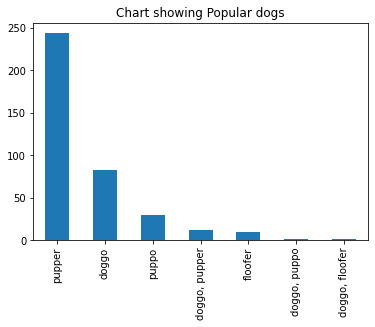

In [88]:
# a bar plot of the most popular dog type
last_df.dog_type.value_counts().plot.bar(title='Chart showing Popular dogs')
fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

### insights

The most popular dogtype is pupper while least is doggofloofer

In [86]:
# The most popular dogs name
last_df.name.value_counts()

None          744
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Gert            1
Dex             1
Ace             1
Tayzie          1
Christoper      1
Name: name, Length: 957, dtype: int64

### Visuaization

In [89]:
# using value counts to see the popular dog names in descending order
last_df.name.value_counts()[:20].plot.bar(title='Popular dog names')
fig = plt.gcf() 
fig.savefig('output2.png',bbox_inches='tight');

### insights

Charlieis the most popular dog name.

### Visualization

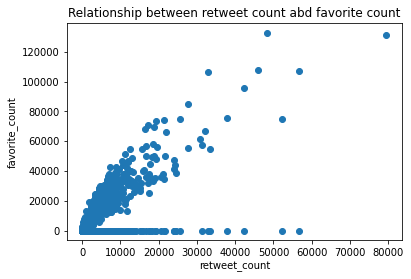

<Figure size 432x288 with 0 Axes>

In [90]:
# bivariate plot of favourite counts against retweet count
plt.scatter(x=last_df.retweet_count,y=last_df.favorite_count)
plt.title('Relationship between retweet count abd favorite count')
plt.xlabel('retweet_count')
plt.ylabel('favorite_count')
plt.show()
fig = plt.gcf()
#plt.savefig('X:/' + newName + '.png', 
fig.savefig('output2.png',bbox_inches='tight');

In [88]:
# Getting the correlation there is a strong correlation betwee totals and permits,totals and hand gun,for the columns ill be working on
last_df.corr()

tweet_id  rating_numerator  retweet_count  favorite_count  \
tweet_id          1.000000          0.049552       0.389995        0.528210   
rating_numerator  0.049552          1.000000      -0.000231       -0.000536   
retweet_count     0.389995         -0.000231       1.000000        0.702881   
favorite_count    0.528210         -0.000536       0.702881        1.000000   
rating            0.047410          0.982959       0.009617        0.008456   

                    rating  
tweet_id          0.047410  
rating_numerator  0.982959  
retweet_count     0.009617  
favorite_count    0.008456  
rating            1.000000

### Insights

There seems to be a high correlation between favourite count and retweet count. 

### Visualization

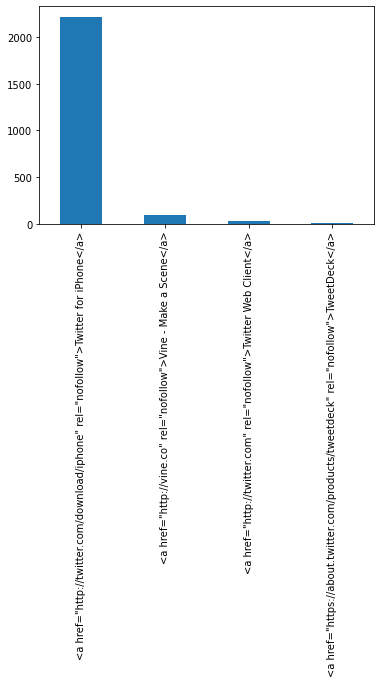

In [91]:
# the most popular source by getting value count
last_df.source.value_counts().plot.bar()
fig = plt.gcf()
#plt.savefig('X:/' + newName + '.png', 
fig.savefig('output2.png',bbox_inches='tight');

### insights

Twitter for iphone is most and common users used to vote 